# Mobile Banking Adoption in Emerging Economies: Coursework 2 Analysis

## 📊 Objective
This notebook analyzes mobile banking usage across Pakistan, India, and Kenya using the World Bank's Global Findex Database 2021.



In [1]:
!pip install imbalanced-learn xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))



Saving Synthetic_Mobile_Banking_Data.csv to Synthetic_Mobile_Banking_Data.csv


In [4]:
# Preprocessing
cat_cols = ['Country', 'Gender', 'Education_Level', 'Employment_Status', 'Urban_Rural', 'Income_Level']
df_encoded = df.copy()
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    le_dict[col] = le

X = df_encoded.drop(columns=['Uses_Mobile_Banking'])
y = df_encoded['Uses_Mobile_Banking']



In [5]:
# Split and balance with SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:07:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       214
           1       0.66      0.84      0.74       146

    accuracy                           0.76       360
   macro avg       0.76      0.77      0.76       360
weighted avg       0.78      0.76      0.76       360



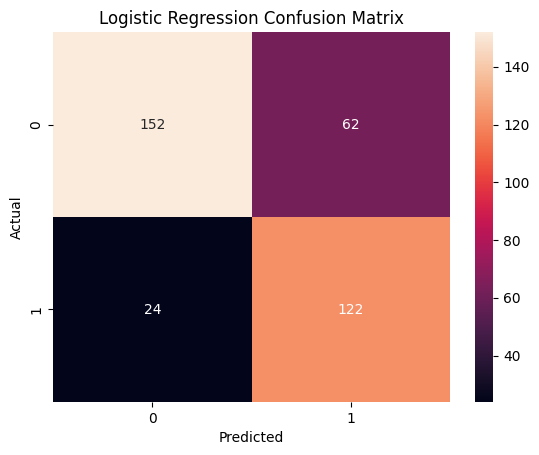


Random Forest
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       214
           1       0.71      0.71      0.71       146

    accuracy                           0.76       360
   macro avg       0.76      0.76      0.76       360
weighted avg       0.76      0.76      0.76       360



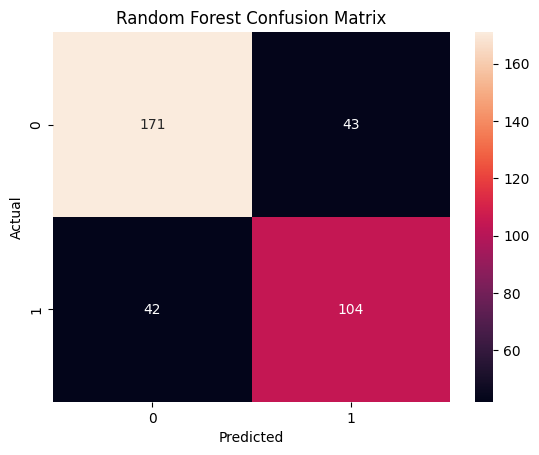


XGBoost
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       214
           1       0.71      0.66      0.68       146

    accuracy                           0.75       360
   macro avg       0.74      0.74      0.74       360
weighted avg       0.75      0.75      0.75       360



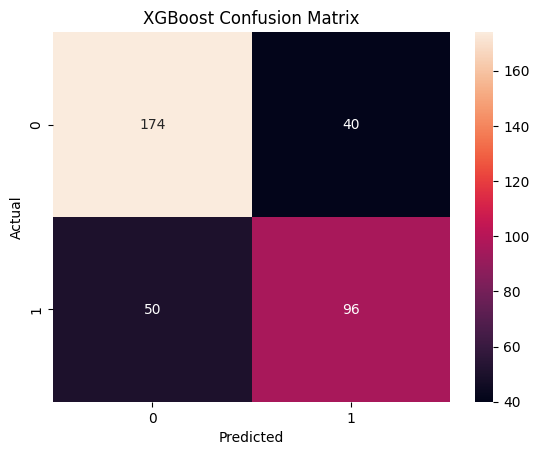

In [7]:
# Models
log_model = LogisticRegression()
log_model.fit(X_train_res, y_train_res)
rf_model = RandomForestClassifier()
rf_model.fit(X_train_res, y_train_res)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_res, y_train_res)

# Predictions
models = {'Logistic Regression': log_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(name + " Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()




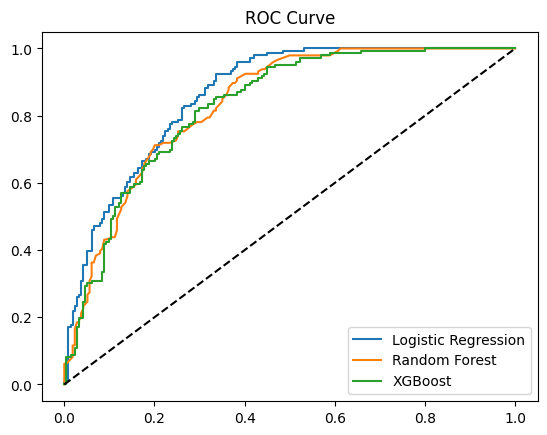

In [8]:
# ROC Curve
plt.figure()
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title("ROC Curve")
plt.show()



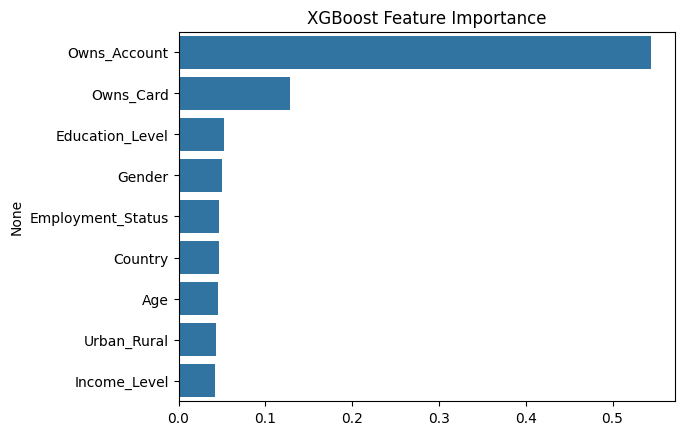

In [9]:
# Feature Importance (XGBoost)
xgb_imp = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=xgb_imp.values, y=xgb_imp.index)
plt.title("XGBoost Feature Importance")
plt.show()

## Key Insights
- Pakistan has the highest mobile banking usage (~39.5%), indicating rapid digital financial adoption, possibly driven by growing fintech platforms like JazzCash and Easypaisa.
- Kenya follows closely (~37.5%), consistent with its strong mobile money infrastructure (e.g., M-Pesa).
- India has a slightly lower rate (~37.25%), but still shows substantial engagement with mobile banking platforms, supported by UPI and Aadhaar-linked accounts.